In [44]:
import os
import numpy as np
import pandas as pd

In [45]:
os.chdir('data')

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [46]:
[file for file in os.listdir() if(file.endswith('.csv'))]

['Median Incomes.csv',
 'Median Monthly Rent.csv',
 'Home Ownership.csv',
 'Total Population.csv',
 'Uninsured.csv',
 'Unemployment Rate.csv',
 'Severe Rent Burden.csv',
 'Educational Attainment.csv',
 'Overcrowded Rental Housing.csv',
 'SNAP (Food Stamps).csv',
 'Household Income.csv',
 'Public Assistance.csv',
 'Employment Population Ratio.csv',
 'Total Population by Race_Ethnicity.csv']

In [4]:
dfs = {}
for file in os.listdir():
    if (file.endswith('.csv')):
        key = file[:-4].replace(' ', '_').lower()
        #print(key)
        dfs[key] = pd.read_csv(file, skiprows=4, encoding='utf8', low_memory=False)
        #print(f"{key} - {sorted(set(dfs[key]['TimeFrame'].tolist()))}")

In [ ]:
dfs.keys()

In [ ]:
for key in dfs.keys():
    print(f'{key} - {dfs[key].columns.tolist()}')
    print(sorted(dfs[key]['TimeFrame'].value_counts().index))

In [ ]:
for key in dfs.keys():
    if('Number' in list(set(dfs[key]['DataFormat'].tolist())) ):
        print(key)
        

In [5]:
standard = {}
extra = {}
for key in dfs.keys():
    if(dfs[key].columns[1] == 'TimeFrame' and key != 'public_assistance'):
        print(f'{key} - {dfs[key].columns.tolist()}')
        standard[key] = dfs[key]
        if(key == 'total_population'):
            standard[key] = dfs[key][~dfs[key].Fips.str.contains('uhf')]
            standard[key].Fips = standard[key].Fips.astype(int)
        if(key == 'median_monthly_rent'):
            standard[key]['DataFormat'] = 'Number'
    else:
        extra[key] = dfs[key]
    #print(dfs[key].head(2))

median_monthly_rent - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
home_ownership - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
total_population - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
unemployment_rate - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
severe_rent_burden - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
overcrowded_rental_housing - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
employment_population_ratio - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']


/Users/tavares/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
print('standard: ', list(standard.keys()))
print('')
print('extra: ', list(extra.keys()))

standard:  ['median_monthly_rent', 'home_ownership', 'total_population', 'unemployment_rate', 'severe_rent_burden', 'overcrowded_rental_housing', 'employment_population_ratio']

extra:  ['median_incomes', 'uninsured', 'educational_attainment', 'snap_(food_stamps)', 'household_income', 'public_assistance', 'total_population_by_race_ethnicity']


In [70]:
df = standard['median_monthly_rent'][['TimeFrame','Fips','Location']]

In [71]:
df = df.merge(standard['total_population'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Population'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [72]:
df = df.merge(standard['median_monthly_rent'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Rent'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [73]:
df = df.merge(standard['severe_rent_burden'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Rent_Burden'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['overcrowded_rental_housing'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Overcrowded'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [74]:
df = df.merge(standard['home_ownership'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Owner'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [75]:
df = df.merge(standard['employment_population_ratio'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Employment_Ratio'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['unemployment_rate'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Unemployment'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [59]:
print(df.shape)
df.head()

(910, 10)


,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment
0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033
1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033
2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088
3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066
4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066


In [60]:
for key in extra:
    print(f'{key} - {extra[key].columns.tolist()}')

median_incomes - ['Location', 'Household Type', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
uninsured - ['Location', 'Age Group', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
educational_attainment - ['Location', 'Education Level', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
snap_(food_stamps) - ['Location', 'Recipient', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
household_income - ['Location', 'Income Level', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
public_assistance - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
total_population_by_race_ethnicity - ['Location', 'Race/Ethnicity', 'TimeFrame', 'DataFormat', 'Data', 'Fips']


In [76]:
median_incomes = extra['median_incomes'][extra['median_incomes']['Household Type']=='All Households']
median_incomes = median_incomes[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
median_incomes.columns = ['Median_Income']
#median_incomes['Type'] = 'median_income'
median_incomes = median_incomes.reset_index()
print(median_incomes.shape)
median_incomes.head()
df = df.merge(median_incomes,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(910, 3)


In [77]:
uninsured = extra['uninsured'][extra['uninsured']['Age Group']=='All Ages']
uninsured = uninsured[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
uninsured.columns = ['Uninsured_No','Uninsured_Pct']
#uninsured['Type'] = 'uninsured'
uninsured = uninsured.reset_index()
print(uninsured.shape)
uninsured.head()
df = df.merge(uninsured,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(715, 4)


In [78]:
education = extra['educational_attainment']
education = education[['TimeFrame','Fips','Education Level','DataFormat','Data']]
education = education[education['Education Level'].str.contains('Bachelor')]
education = education.set_index(['TimeFrame','Fips','Education Level','DataFormat']).unstack()
education.columns = ['Education_No','Education_Pct']
#education['Type'] = 'education'
education = education.reset_index().rename(columns={'Education Level': 'Education_Level'})
print(education.shape)
education.head()
df = df.merge(education,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(845, 5)


In [79]:
snap = extra['snap_(food_stamps)'][extra['snap_(food_stamps)']['Recipient']=='Households']
snap = snap[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
snap.columns = ['Snap_No','Snap_Pct']
#snap['Type'] = 'snap'
snap = snap.reset_index()
print(snap.shape)
snap.head()
df = df.merge(snap,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(715, 4)


In [64]:
households = extra['household_income']
households = households[['TimeFrame','Fips','Income Level','DataFormat','Data']].set_index(['TimeFrame','Fips','Income Level','DataFormat']).unstack()
households.columns = ['Income_No','Income_Pct']
#households['Type'] = 'household_income'
households = households.reset_index().rename(columns={'Income Level': 'Income_Level'})
print(households.shape)
households.head()
df = df.merge(households,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(7280, 5)


In [66]:
public_assistance = extra['public_assistance']
public_assistance = public_assistance[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
public_assistance.columns = ['PA_No','PA_Pct']
#public_assistance['Type'] = 'public_assistance'
public_assistance = public_assistance.reset_index()
print(public_assistance.shape)
public_assistance.head()
df = df.merge(public_assistance,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(455, 4)


In [67]:
pop_by_race = extra['total_population_by_race_ethnicity']
pop_by_race = pop_by_race[['TimeFrame','Fips','Race/Ethnicity','DataFormat','Data']].set_index(['TimeFrame','Fips','Race/Ethnicity','DataFormat']).unstack()
pop_by_race.columns = ['Race_No','Race_Pct']
#pop_by_race['Type'] = 'population_by_race'
pop_by_race = pop_by_race.reset_index().rename(columns={'Race/Ethnicity': 'Race'})
print(pop_by_race.shape)
pop_by_race.head()
df = df.merge(pop_by_race,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(3250, 5)


In [81]:
df.to_csv('../data.csv')

In [80]:
df.shape

(910, 18)

In [22]:
sorted(pop_by_race['TimeFrame'].value_counts().index)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [23]:
print(df.shape)
print(sorted(df['TimeFrame'].value_counts().index))
print(df.columns.tolist())
df.head(10)

(138320, 26)
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
['TimeFrame', 'Fips', 'Location', 'Population', 'Rent', 'Rent_Burden', 'Overcrowded', 'Owner', 'Employment_Ratio', 'Unemployment', 'Median_Income', 'Uninsured_No', 'Uninsured_Pct', 'Education_Level', 'Education_No', 'Education_Pct', 'Income_Level', 'Income_No', 'Income_Pct', 'Snap_No', 'Snap_Pct', 'PA_No', 'PA_Pct', 'Race', 'Race_No', 'Race_Pct']


,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,...,Income_Level,Income_No,Income_Pct,Snap_No,Snap_Pct,PA_No,PA_Pct,Race,Race_No,Race_Pct
0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"$100,000 to $199,999",8039.72359,0.29012,1198.0,0.04744,663.0,0.01296,NaN,NaN,NaN
1,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"$15,000 to $24,999",1385.18444,0.04998,1198.0,0.04744,663.0,0.01296,NaN,NaN,NaN
2,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"$200,000 or more",5041.99061,0.18194,1198.0,0.04744,663.0,0.01296,NaN,NaN,NaN
3,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"$25,000 to $34,999",1196.58936,0.04318,1198.0,0.04744,663.0,0.01296,NaN,NaN,NaN
4,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"$35,000 to $49,999",2691.21549,0.09711,1198.0,0.04744,663.0,0.01296,NaN,NaN,NaN
5,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"$50,000 to $74,999",3834.49746,0.13837,1198.0,0.04744,663.0,0.01296,NaN,NaN,NaN
6,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"$75,000 to $99,999",2743.71519,0.09901,1198.0,0.04744,663.0,0.01296,NaN,NaN,NaN
7,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"Under $15,000",2779.25345,0.10029,1198.0,0.04744,663.0,0.01296,NaN,NaN,NaN
8,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"$100,000 to $199,999",11868.27641,0.29012,2525.0,0.05822,656.0,0.00869,NaN,NaN,NaN
9,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,...,"$15,000 to $24,999",2044.81556,0.04998,2525.0,0.05822,656.0,0.00869,NaN,NaN,NaN


In [ ]:
"""
median_incomes - 2005-2018
monthly_rent - 2009-2018
arrests - 2000-2019
child_population_by_race_ethnicity - 2005-2018
median_monthly_rent - 2005-2018
home_ownership - 2005-2018
total_population - 2005-2018
child_population - 2005-2018
uninsured - 2008-2018
public_assistance_by_program_type - 2005-2017
unemployment_rate_ - 2005-2018
severe_rent_burden - 2005- 2018
educational_attainment - 2006-2018
overcrowded_rental_housing - 2005-2018
snap_(food_stamps) - 2001-2019
household_income - 2005-2018
public_assistance - 2005-2017
employment_population_ratio - 2005-2018
total_population_by_race_ethnicity - 2009-2018
"""

In [ ]:
#df.to_csv('../data.csv')

In [24]:
df.columns[1:]

Index(['Fips', 'Location', 'Population', 'Rent', 'Rent_Burden', 'Overcrowded',
       'Owner', 'Employment_Ratio', 'Unemployment', 'Median_Income',
       'Uninsured_No', 'Uninsured_Pct', 'Education_Level', 'Education_No',
       'Education_Pct', 'Income_Level', 'Income_No', 'Income_Pct', 'Snap_No',
       'Snap_Pct', 'PA_No', 'PA_Pct', 'Race', 'Race_No', 'Race_Pct'],
      dtype='object')

In [25]:
d = df[['TimeFrame','Fips','Population','Rent','Rent_Burden','Overcrowded','Employment_Ratio','Unemployment','Median_Income']].drop_duplicates().dropna()
d.Population = d.Population.round(2)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138320 entries, 0 to 138319
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TimeFrame         138320 non-null  int64  
 1   Fips              138320 non-null  int64  
 2   Location          138320 non-null  object 
 3   Population        138320 non-null  float64
 4   Rent              138320 non-null  float64
 5   Rent_Burden       138320 non-null  float64
 6   Overcrowded       138112 non-null  float64
 7   Owner             138320 non-null  float64
 8   Employment_Ratio  138296 non-null  float64
 9   Unemployment      138296 non-null  float64
 10  Median_Income     138320 non-null  float64
 11  Uninsured_No      132600 non-null  float64
 12  Uninsured_Pct     132600 non-null  float64
 13  Education_Level   137800 non-null  object 
 14  Education_No      137760 non-null  float64
 15  Education_Pct     137800 non-null  float64
 16  Income_Level      13

In [27]:
print(df.Location.value_counts())
print(df.Education_Level.value_counts())
print(df.Income_Level.value_counts())
print(df.Race.value_counts())

Upper West Side       2128
Borough Park          2128
Bayside               2128
New York City         2128
Queens Village        2128
                      ... 
Bushwick              2128
Washington Heights    2128
Riverdale             2128
Williamsbridge        2128
Ridgewood/Glendale    2128
Name: Location, Length: 65, dtype: int64
High School Degree              27560
Some College                    27560
Less than High School Degree    27560
Associate's Degree              27560
Bachelor's Degree or Higher     27560
Name: Education_Level, dtype: int64
$25,000 to $34,999      17290
$200,000 or more        17290
$15,000 to $24,999      17290
$75,000 to $99,999      17290
$35,000 to $49,999      17290
$50,000 to $74,999      17290
Under $15,000           17290
$100,000 to $199,999    17290
Name: Income_Level, dtype: int64
Latino    26000
Asian     26000
White     26000
Black     26000
Other     26000
Name: Race, dtype: int64


In [28]:
df.describe()

,TimeFrame,Fips,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,...,Education_No,Education_Pct,Income_No,Income_Pct,Snap_No,Snap_Pct,PA_No,PA_Pct,Race_No,Race_Pct
count,138320.000000,1.383200e+05,1.383200e+05,138320.000000,138320.000000,138112.000000,138320.000000,138296.000000,138296.000000,138320.000000,...,1.377600e+05,137800.000000,138295.000000,138320.000000,7.072000e+04,70720.000000,57720.000000,57720.000000,1.300000e+05,130000.000000
mean,2013.101504,5.919718e+04,3.880296e+05,1297.829156,0.280316,0.108974,0.314514,0.575157,0.090336,59799.148711,...,5.352496e+04,0.199999,17893.523165,0.124964,4.211236e+04,0.314662,16769.415662,0.046546,7.682379e+04,0.200000
std,3.207299,4.490781e+05,1.102952e+06,379.670785,0.059713,0.053171,0.184032,0.070881,0.039030,25823.256120,...,1.742603e+05,0.143646,53794.297586,0.066485,1.215362e+05,0.183609,48749.153913,0.039513,2.569979e+05,0.212674
min,2005.000000,1.010000e+02,4.384156e+04,590.339490,0.151750,0.013670,0.027630,0.375000,0.021000,17446.707260,...,7.898200e+02,0.013580,0.000000,0.000000,1.135000e+03,0.021730,313.000000,0.002460,3.754626e+02,0.004780
25%,2011.000000,2.050000e+02,1.212970e+05,1061.846290,0.234980,0.068420,0.181250,0.535000,0.060840,42703.028070,...,9.047000e+03,0.087170,4127.000000,0.083120,9.766000e+03,0.172310,2937.000000,0.019130,4.282000e+03,0.028350
50%,2013.000000,3.090000e+02,1.430280e+05,1206.123460,0.283520,0.104810,0.296850,0.572000,0.083070,54407.485730,...,1.769800e+04,0.172720,6318.606260,0.116490,1.546500e+04,0.294990,5183.000000,0.032160,1.837150e+04,0.119265
75%,2016.000000,4.070000e+02,1.793810e+05,1408.610490,0.323970,0.137250,0.422190,0.611000,0.114000,72205.653490,...,3.096400e+04,0.276090,9517.000000,0.154600,2.320400e+04,0.411140,11224.000000,0.063540,5.056800e+04,0.299160
max,2018.000000,3.651000e+06,8.622698e+06,2695.332190,0.464850,0.281860,0.856980,0.751000,0.235860,148152.000000,...,2.319077e+06,0.836550,696223.000000,0.516310,1.004188e+06,0.819310,417988.000000,0.214030,2.945058e+06,0.895140


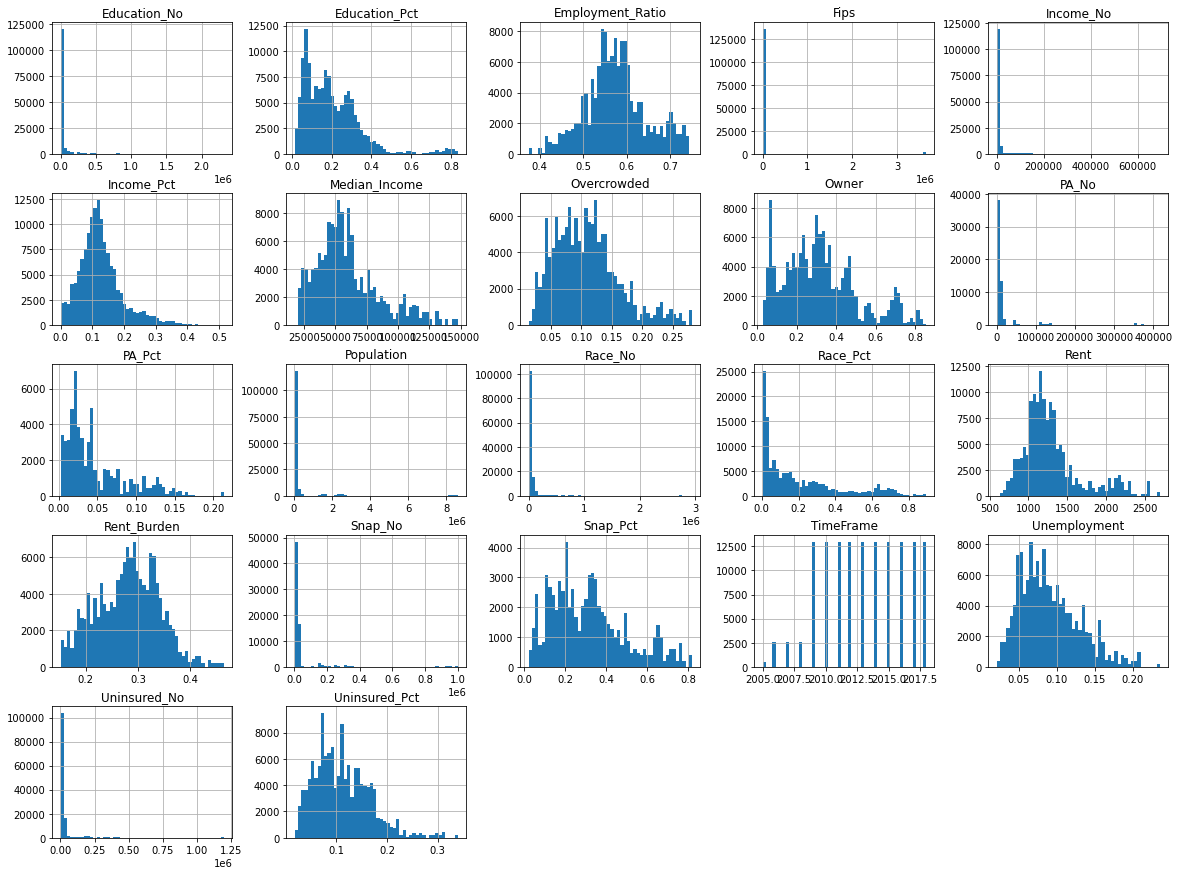

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [32]:
list(set(df.Income_Level))

['$15,000 to $24,999',
 '$35,000 to $49,999',
 '$25,000 to $34,999',
 '$200,000 or more',
 'Under $15,000',
 '$75,000 to $99,999',
 '$50,000 to $74,999',
 '$100,000 to $199,999']

In [30]:
bins=[0.,14999.0,24999.0,34999.0,49999.0,74999.0,99999.0,199999.0,np.inf]
print(bins)

[0.0, 14999.0, 24999.0, 34999.0, 49999.0, 74999.0, 99999.0, 199999.0, inf]


In [31]:
labels=[
    'Under $15,000',
    '$15,000 to $24,999',
    '$25,000 to $34,999',
    '$35,000 to $49,999',
    '$50,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $199,999',
    '$200,000 or more'
    ]
print(labels)

['Under $15,000', '$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $199,999', '$200,000 or more']


In [33]:
pd.cut(df['Median_Income'],bins=bins,labels=labels)

0         $100,000 to $199,999
1         $100,000 to $199,999
2         $100,000 to $199,999
3         $100,000 to $199,999
4         $100,000 to $199,999
                  ...         
138315      $50,000 to $74,999
138316      $50,000 to $74,999
138317      $50,000 to $74,999
138318      $50,000 to $74,999
138319      $50,000 to $74,999
Name: Median_Income, Length: 138320, dtype: category
Categories (8, object): [Under $15,000 < $15,000 to $24,999 < $25,000 to $34,999 < $35,000 to $49,999 < $50,000 to $74,999 < $75,000 to $99,999 < $100,000 to $199,999 < $200,000 or more]

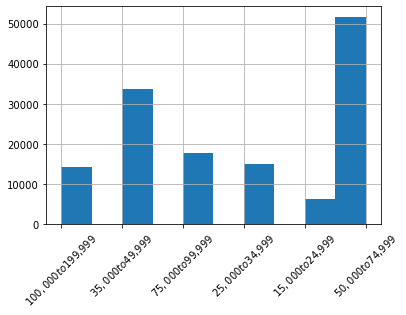

In [34]:
levels = pd.cut(df['Median_Income'],bins=bins,labels=labels)

levels.hist()
plt.xticks(rotation=45)
plt.show()

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Income_Level']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_test_set['Income_Level'].value_counts() / len(strat_test_set)


$75,000 to $99,999      0.125
$25,000 to $34,999      0.125
$50,000 to $74,999      0.125
$200,000 or more        0.125
$15,000 to $24,999      0.125
Under $15,000           0.125
$35,000 to $49,999      0.125
$100,000 to $199,999    0.125
Name: Income_Level, dtype: float64

In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Income_Level', axis=1, inplace=True)
strat_train_set

,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,...,Education_Pct,Income_No,Income_Pct,Snap_No,Snap_Pct,PA_No,PA_Pct,Race,Race_No,Race_Pct
12493,2009,209,Unionport/Soundview,182737.00000,994.89340,0.27581,0.11847,0.18765,0.508,0.11855,...,0.17469,176.00000,0.00277,23773.0,0.37476,13493.0,0.07384,Other,5068.00000,0.02809
82314,2014,403,Jackson Heights,182354.00000,1353.70370,0.33165,0.20365,0.30524,0.614,0.07000,...,0.11020,8435.00000,0.15023,NaN,NaN,NaN,NaN,White,18533.00000,0.10234
135796,2018,411,Bayside,115744.00000,1769.00000,0.22785,0.07113,0.67451,0.582,0.03500,...,0.44810,2539.00000,0.05949,4333.0,0.10153,NaN,NaN,Black,2289.00000,0.01911
48618,2012,107,Upper West Side,198568.00000,1745.45600,0.19051,0.05099,0.30861,0.642,0.06796,...,0.08633,5813.00000,0.05738,NaN,NaN,NaN,NaN,Other,4919.00000,0.02511
109435,2016,409,Woodhaven,164094.00000,1433.57668,0.29458,0.12152,0.45569,0.614,0.05500,...,0.28800,3591.00000,0.08010,12843.0,0.28660,3312.0,0.02018,Asian,40816.00000,0.26335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27547,2010,308,Crown Heights North,119323.00000,1098.78152,0.24069,0.06648,0.19306,0.595,0.10122,...,0.06004,6924.00000,0.13875,NaN,NaN,NaN,NaN,Latino,13537.00000,0.11143
103677,2016,210,Throgs Neck,111431.00000,1193.94963,0.20595,0.07029,0.49613,0.529,0.08400,...,0.15185,5725.00000,0.12910,10518.0,0.23727,3677.0,0.03300,Latino,45410.00000,0.37095
38776,2011,211,Pelham Parkway,121836.00000,1106.60272,0.34460,0.09843,0.26847,0.504,0.14715,...,0.22062,4012.00000,0.09459,14231.0,0.33553,5183.0,0.04254,Black,26562.00000,0.21085
34675,2011,102,Greenwich Village,87331.50891,2237.82148,0.19007,0.04007,0.26997,0.714,0.04824,...,0.03591,3124.45432,0.06915,3409.0,0.07117,430.0,0.00492,Asian,12831.06857,0.15144


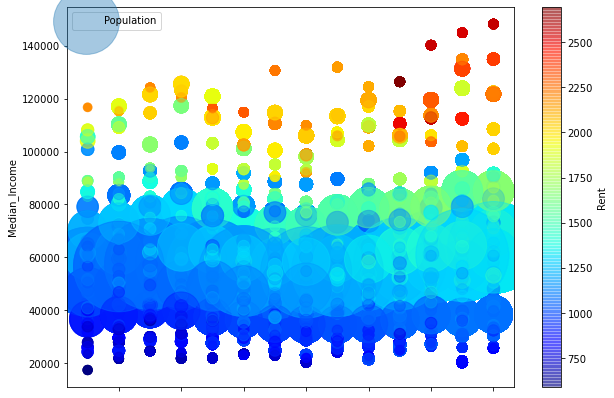

In [37]:
df2 = strat_train_set.copy()
df2.plot(kind='scatter', x='TimeFrame', y='Median_Income', alpha=0.4,
             s=df2['Population']/1000, label='Population', figsize=(10,7),
             c='Rent', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

In [38]:
corr_matrix = df2.corr()

In [43]:
corr_matrix


,TimeFrame,Fips,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,...,Education_No,Education_Pct,Income_No,Income_Pct,Snap_No,Snap_Pct,PA_No,PA_Pct,Race_No,Race_Pct
TimeFrame,1.000000,-0.001088,0.002359,0.200098,0.012946,0.054937,-0.000751,0.171892,-0.368460,0.103754,...,0.006066,-0.001739,0.002428,0.000769,0.018543,0.056288,0.000408,-0.014996,0.002781,0.000190
Fips,-0.001088,1.000000,0.916416,-0.024231,-0.008317,-0.001112,0.007089,0.006232,-0.012051,-0.012012,...,0.797970,-0.000804,0.866993,0.000496,0.902559,-0.015715,0.898354,-0.010757,0.779869,0.000276
Population,0.002359,0.916416,1.000000,-0.029768,-0.004056,0.011861,0.021547,0.013591,-0.023282,-0.017068,...,0.872306,-0.000287,0.943533,0.000112,0.982589,-0.028798,0.967732,-0.029617,0.849621,-0.000214
Rent,0.200098,-0.024231,-0.029768,1.000000,-0.575305,-0.378234,0.212180,0.877891,-0.618605,0.898954,...,-0.017550,-0.001760,-0.011399,0.003328,-0.078012,-0.683878,-0.107785,-0.597189,-0.024672,0.002925
Rent_Burden,0.012946,-0.008317,-0.004056,-0.575305,1.000000,0.642339,-0.141781,-0.605148,0.447980,-0.687104,...,-0.012340,0.000038,-0.023885,-0.001733,0.040632,0.615306,0.062711,0.491905,-0.003729,-0.001760
Overcrowded,0.054937,-0.001112,0.011861,-0.378234,0.642339,1.000000,-0.254627,-0.324835,0.262107,-0.543432,...,0.003242,0.000555,-0.007952,-0.001578,0.043881,0.499581,0.054894,0.295786,0.009719,0.000336
Owner,-0.000751,0.007089,0.021547,0.212180,-0.141781,-0.254627,1.000000,0.193048,-0.420439,0.480998,...,0.022203,0.000219,0.013463,-0.001486,-0.040898,-0.605613,-0.062685,-0.599397,0.018579,0.000663
Employment_Ratio,0.171892,0.006232,0.013591,0.877891,-0.605148,-0.324835,0.193048,1.000000,-0.675955,0.823023,...,0.020391,-0.000869,0.027681,0.001673,-0.036230,-0.712362,-0.067735,-0.644590,0.011807,0.002829
Unemployment,-0.368460,-0.012051,-0.023282,-0.618605,0.447980,0.262107,-0.420439,-0.675955,1.000000,-0.656667,...,-0.029020,0.001013,-0.031861,-0.001353,0.029722,0.673476,0.063811,0.671608,-0.020312,-0.001644
Median_Income,0.103754,-0.012012,-0.017068,0.898954,-0.687104,-0.543432,0.480998,0.823023,-0.656667,1.000000,...,-0.005821,-0.001159,0.000593,0.002661,-0.078158,-0.806000,-0.107002,-0.691644,-0.014183,0.002545


In [39]:
corr_matrix['Rent'].sort_values(ascending=False)

Rent                1.000000
Median_Income       0.898954
Employment_Ratio    0.877891
Owner               0.212180
TimeFrame           0.200098
Income_Pct          0.003328
Race_Pct            0.002925
Education_Pct      -0.001760
Income_No          -0.011399
Education_No       -0.017550
Fips               -0.024231
Race_No            -0.024672
Population         -0.029768
Uninsured_No       -0.060232
Snap_No            -0.078012
PA_No              -0.107785
Overcrowded        -0.378234
Uninsured_Pct      -0.422033
Rent_Burden        -0.575305
PA_Pct             -0.597189
Unemployment       -0.618605
Snap_Pct           -0.683878
Name: Rent, dtype: float64

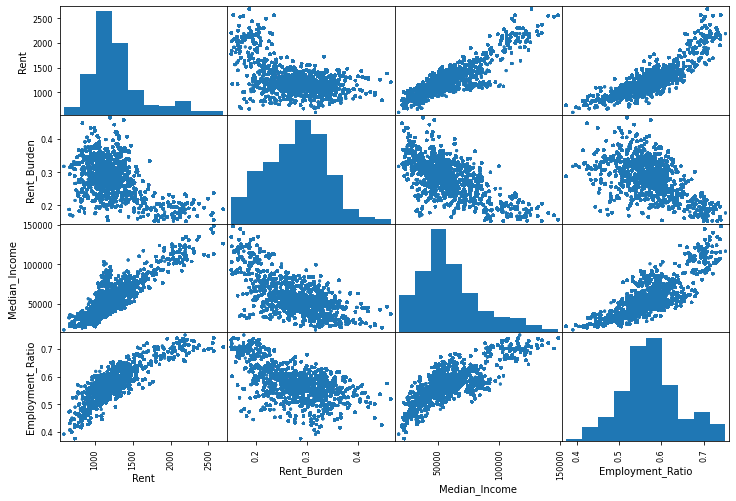

In [40]:
from pandas.plotting import scatter_matrix

attributes = ['Rent', 'Rent_Burden', 'Median_Income', 'Employment_Ratio']

scatter_matrix(df2[attributes], figsize=(12,8))

plt.show()

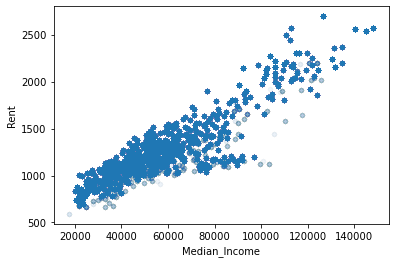

In [41]:
df2.plot(kind='scatter', 
              x='Median_Income', 
              y='Rent', 
              alpha=0.01)

plt.show()

In [47]:
df2 = strat_train_set[['TimeFrame',
           'Fips',
           'Population',
           'Rent_Burden',
           'Median_Income',
           'Employment_Ratio',
           'Unemployment']]
df2_labels = strat_train_set['Rent'].copy()

In [48]:
print(df2.shape)
df2.head(2)

(110656, 7)


,TimeFrame,Fips,Population,Rent_Burden,Median_Income,Employment_Ratio,Unemployment
12493,2009,209,182737.0,0.27581,38496.82171,0.508,0.11855
82314,2014,403,182354.0,0.33165,51376.27514,0.614,0.07000


## Data Cleaning

In [ ]:
# Replacing missing values with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
#imputer.fit()
#imputer._statistics_
#X = imputer.transform()
#df_tr = pd.DataFrame(X, columns=df2.columns, index=df.index)

In [ ]:
income_cat = df[['Income_Level']]
income_cat.head(10)

## Categorical Attributes

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
income_cat_encoded = ordinal_encoder.fit_transform(income_cat)
income_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_

### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
income_cat_1hot = cat_encoder.fit_transform(income_cat)
income_cat_1hot
print(cat_encoder.categories_)
income_cat_1hot.toarray()

In [49]:
# Assign the data to X and y

X = df2[['Fips','Population','Median_Income']]
y = df2['Rent'].values.reshape(-1, 1)
print(X.shape, y.shape)

KeyError: 'Rent'

In [ ]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
# Plot the Residuals for the Training and Testing data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [ ]:
d.Population